<H3>Exploratory Data Analysis<H3>

<ul>
<li>Type: The type of transaction</li>
<li>Amount: The amount of money transferred</li>
<li>NameOrig: The origin account name</li>
<li>OldBalanceOrg: The origin accounts balance before the transaction</li>
<li>NewBalanceOrg: The origin accounts balance after the transaction</li>
<li>NameDest: The destination account name</li>
<li>OldbalanceDest: The destination accounts balance before the transaction</li>
<li>NewbalanceDest: The destination accounts balance after the transaction</li>
<li>IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD)</li>
<li>IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information.</li>
</ul>


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("..\Data\dataset.csv")

In [34]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [21]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
#Selecting a random sample to process our data
df_sample = df.sample(500000, random_state=42)

In [15]:
df_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.000000
mean,243.533124,1.806645e+05,8.309977e+05,8.524263e+05,1.106153e+06,1.231487e+06,0.001294,0.000002
std,142.606593,6.053009e+05,2.881332e+06,2.917542e+06,3.373751e+06,3.657557e+06,0.035949,0.001414
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.335691e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.493207e+04,1.422100e+04,0.000000e+00,1.329772e+05,2.160908e+05,0.000000,0.000000
75%,335.000000,2.092577e+05,1.072500e+05,1.445806e+05,9.534888e+05,1.121774e+06,0.000000,0.000000
max,742.000000,5.365362e+07,3.589244e+07,3.614984e+07,2.754052e+08,3.114049e+08,1.000000,1.000000


In [30]:
print(df_sample["type"].value_counts())

CASH_OUT    175646
PAYMENT     169277
CASH_IN     109939
TRANSFER     41929
DEBIT         3209
Name: type, dtype: int64


In [18]:
df_sample["isFraud"].value_counts()

0    499353
1       647
Name: isFraud, dtype: int64

In [19]:
df_sample["isFlaggedFraud"].value_counts()

0    499999
1         1
Name: isFlaggedFraud, dtype: int64

<H3>Univariate Analysis</H3>

<H5>HISTPOLOTS</H5>

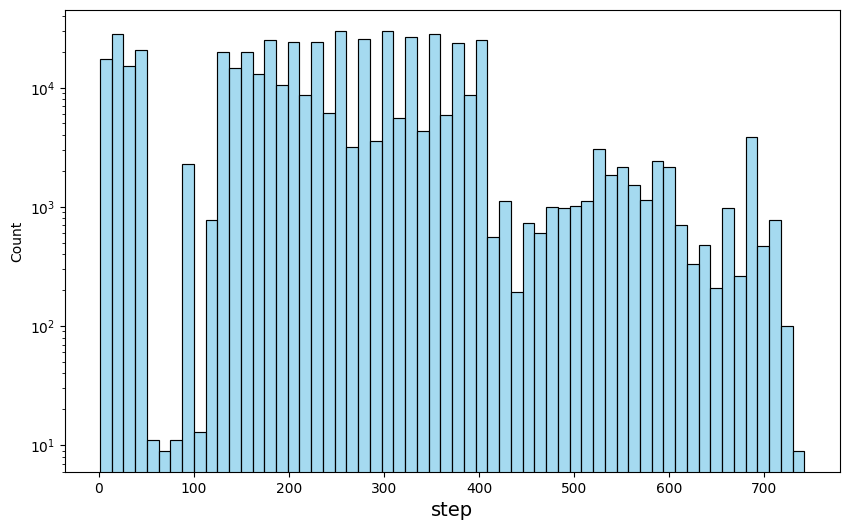

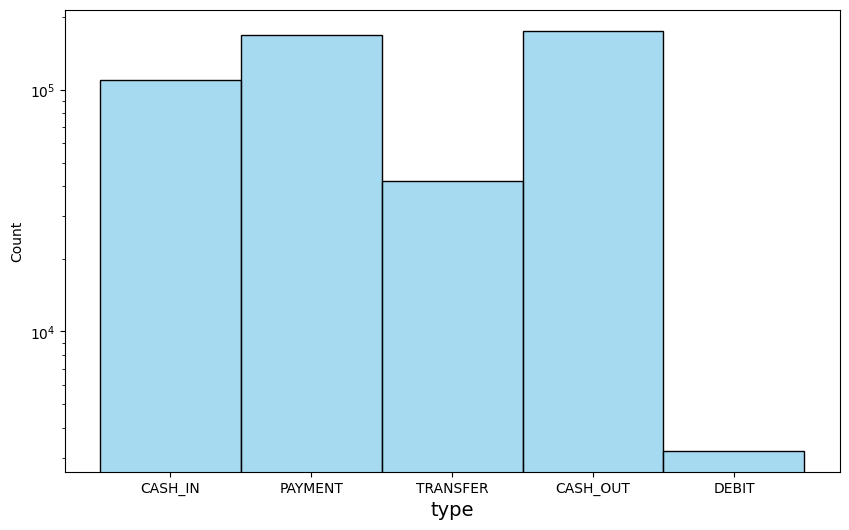

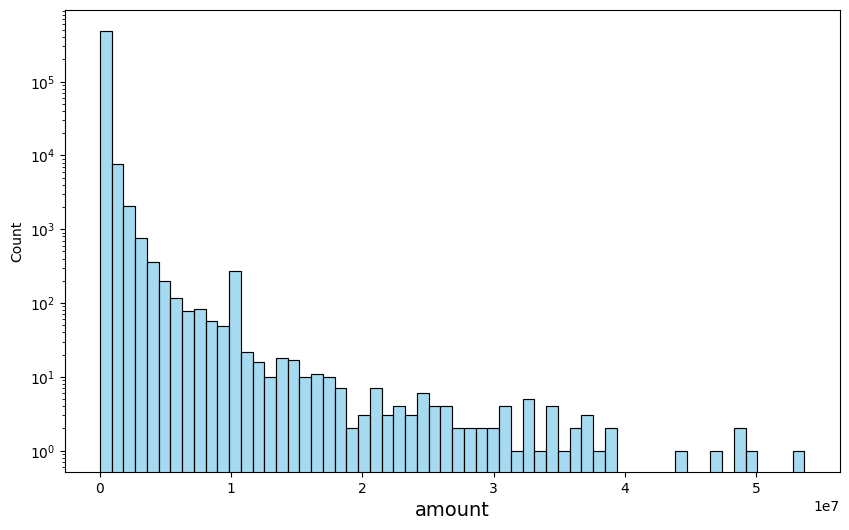

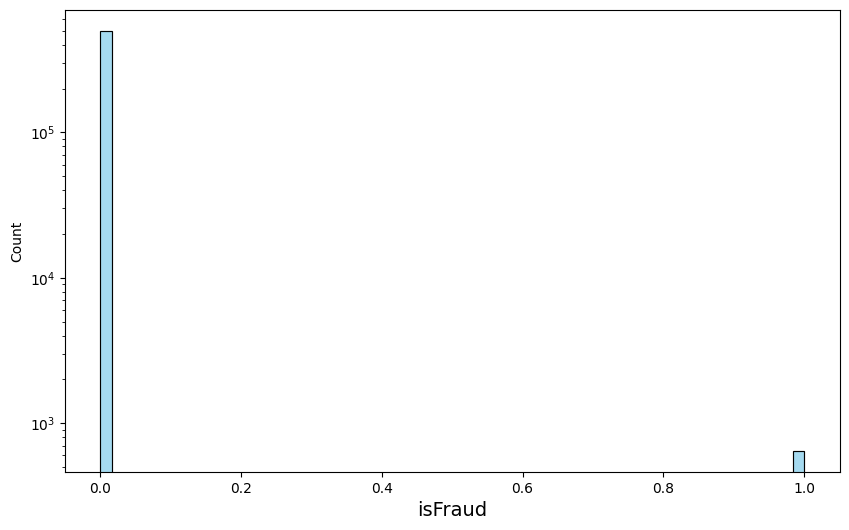

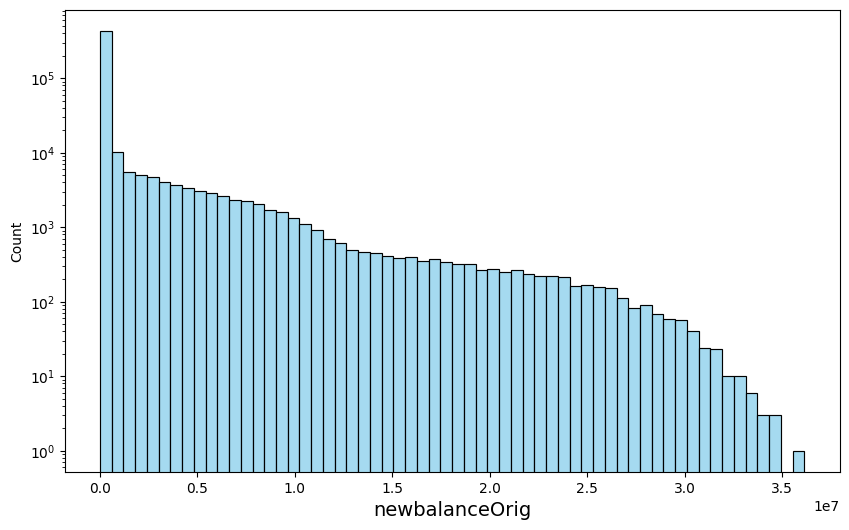

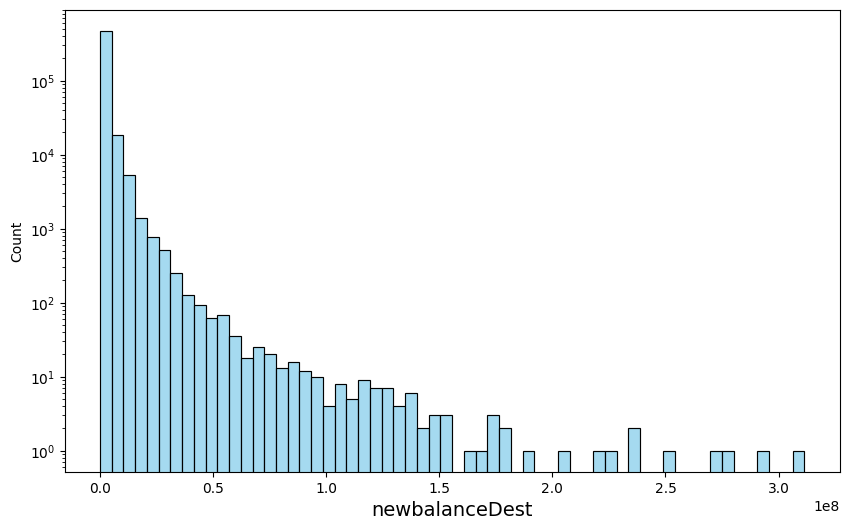

In [25]:
#create a list of the features we are going to use in the analysis and then we will use a for loop to create a histogram for each feature
features = ['step', 'type', 'amount','isFraud','newbalanceOrig','newbalanceDest' ]

for i in features:
	plt.figure(figsize=[10, 6])
	sns.histplot(df_sample[i], bins= 60, kde = False, color = "skyblue")
	plt.xlabel(i, fontsize = 14)
	plt.ylabel("Count")
	plt.yscale("log")
	plt.show()

<H5>Barplots</H5>

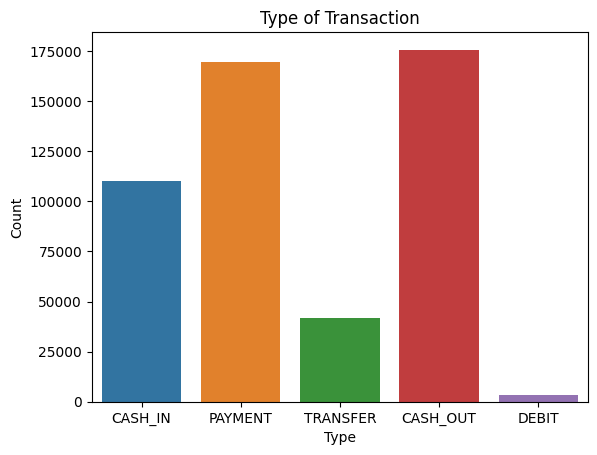

In [27]:
sns.countplot(x='type', data=df_sample)
plt.title('Type of Transaction')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

<H3>Bivariant Analysis</H3>

<H5>Scatterplots</H5>

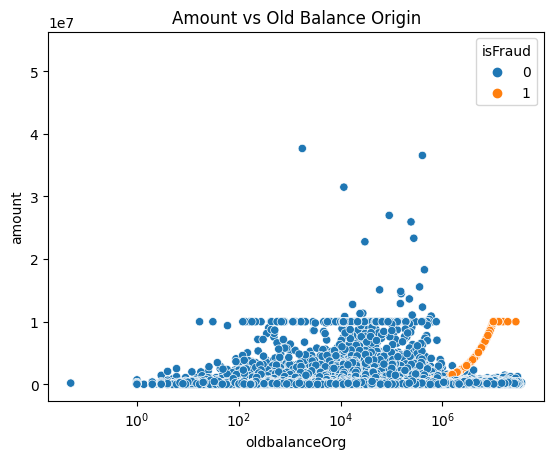

In [32]:
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df_sample, hue='isFraud')
plt.title('Amount vs Old Balance Origin')
plt.xscale('log')

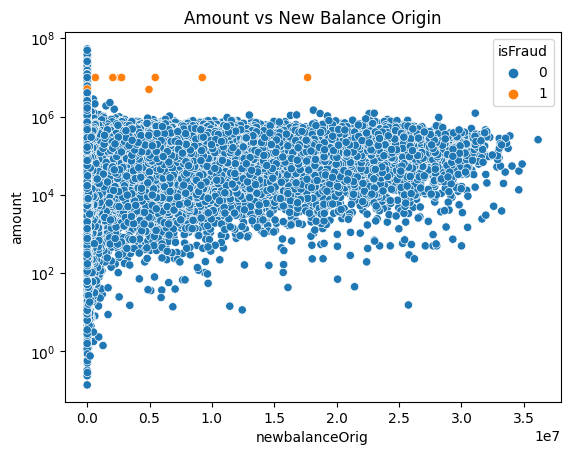

In [39]:
sns.scatterplot(x='newbalanceOrig', y='amount', data=df_sample, hue='isFraud')
plt.title('Amount vs New Balance Origin')
plt.yscale('log')

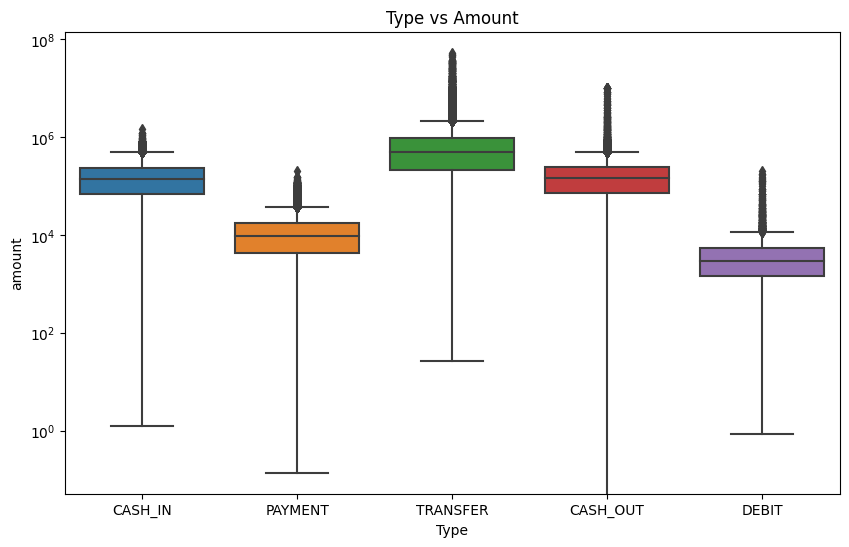

In [44]:
plt.figure(figsize=[10, 6])
sns.boxplot(x='type', y='amount', data=df_sample)
plt.title('Type vs Amount')
plt.xlabel('Type')
plt.yscale('log')
plt.show()

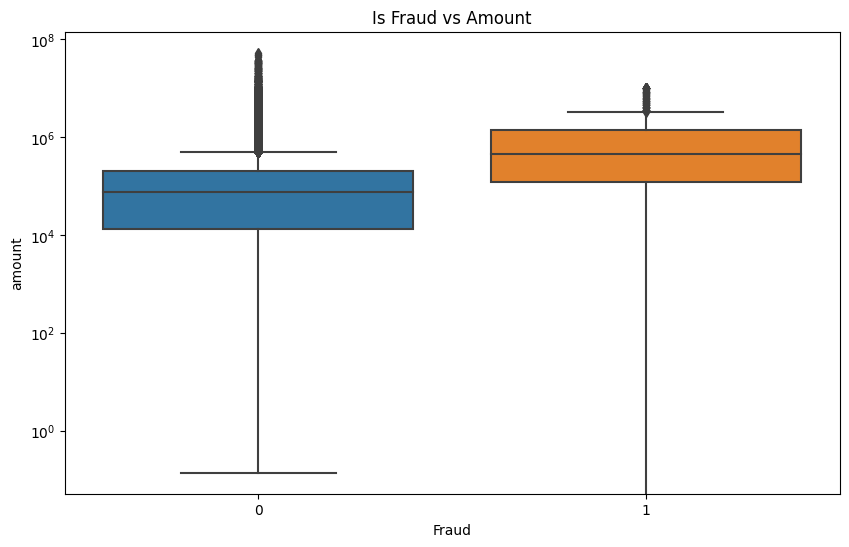

In [46]:
plt.figure(figsize=[10, 6])
sns.boxplot(x='isFraud', y='amount', data=df_sample)
plt.title('Is Fraud vs Amount')
plt.xlabel('Fraud')
plt.yscale('log')
plt.show()

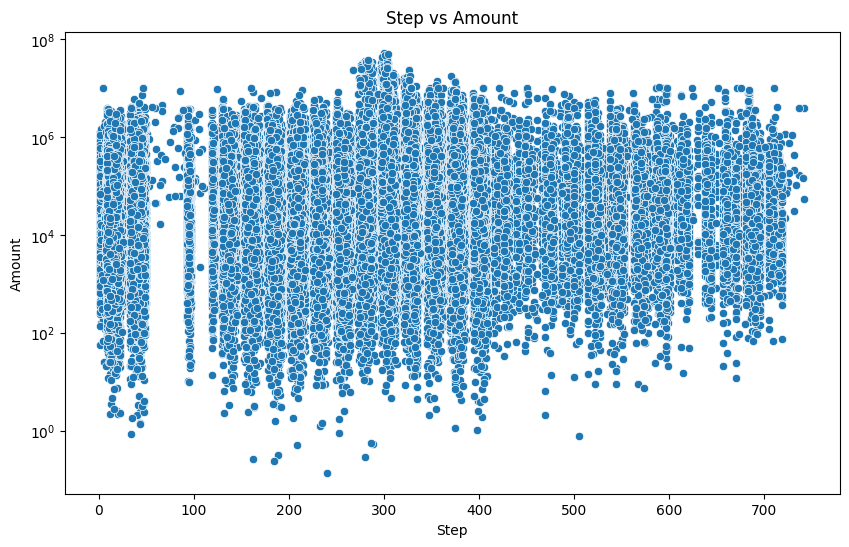

In [47]:
plt.figure(figsize=[10, 6])
sns.scatterplot(x='step', y='amount', data=df_sample)
plt.title('Step vs Amount')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

<H3>Multivariante Analysis</H3>

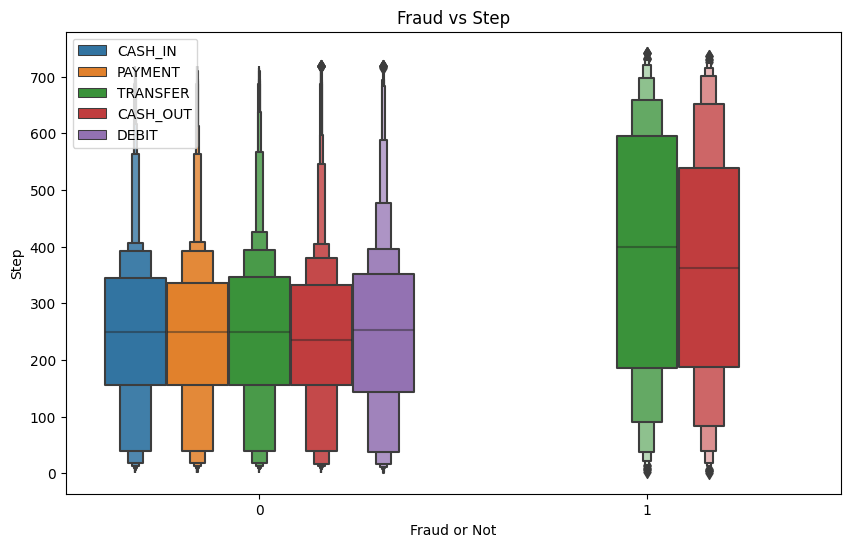

In [49]:
plt.figure(figsize=[10, 6])
sns.boxenplot(x='isFraud', y='step', data=df_sample, hue='type')
plt.legend(loc='upper left')
plt.xlabel('Fraud or Not')
plt.ylabel('Step')
plt.title('Fraud vs Step')
plt.show()